# Exploring Dandiset 001276: Impact of Burst Number Variation on Permeabilization Distribution

This Jupyter notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please use caution when interpreting the code or the results it produces.

## Overview of Dandiset 001276

- **Title**: NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers
- **Description**: Experiments were conducted using a four-electrode array focusing on optimizing the CANCAN protocol.
- [Explore this Dandiset on Neurosift](https://neurosift.app/dandiset/001276)

## Summary of Notebook Coverage

This notebook will demonstrate:
- How to load and explore this dataset using the DANDI API
- How to open and visualize NWB files
- Insights into the data and possible directions for further analysis

## Required Packages

The following packages are required to run this notebook:
- pynwb
- h5py
- remfile

## Load the Dandiset using the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 108 assets in the dataset

First 5 assets:
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


## Load the NWB File

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file from the asset URL
url = "https://api.dandiarchive.org/api/assets/95141d7a-82aa-4552-940a-1438a430a0d7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Loaded NWB file with session ID: {nwb.session_id}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file with session ID: single_time_point


The NWB file is loaded from the path `sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb`. It contains various metadata which will be accessed below.

## Explore NWB Metadata and Data

Metadata Summary:
Session Description: Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless steel setup with an inter-electrode distance of 10.0 mm. The CanCan exposure protocol involved delivering packets of 600 ns pulses from four electrodes. Initially, a single 600 ns pulse (7.2 kV) was applied from one electrode (e.g., electrode 1), constituting phase 1. Subsequently, simultaneous 600 ns pulses with an amplitude reduced by 12.5% were delivered from two electrodes (e.g., electrodes 2 and 4), followed by another set of simultaneous pulses with an a

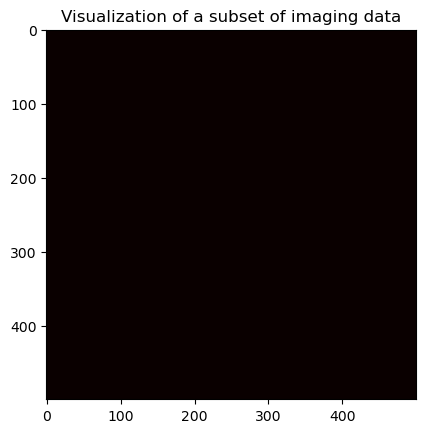

In [3]:
metadata = {
    "Session Description": nwb.session_description,
    "Identifier": nwb.identifier,
    "Lab": nwb.lab,
    "Institution": nwb.institution
}
print("Metadata Summary:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Access data from acquisition section
imaging_data = nwb.acquisition["SingleTimePointImaging"].data
print(f"Data shape: {imaging_data.shape}")

# Visualize a subset of the data
import matplotlib.pyplot as plt

plt.imshow(imaging_data[0, 0:500, 0:500], cmap='hot')
plt.title("Visualization of a subset of imaging data")
plt.show()

## Conclusions and Future Directions

This notebook has demonstrated how to access and explore parts of Dandiset 001276 using the DANDI API and NWB format. Future analysis can delve into specific experimental conditions and further statistical analyses of the imaging data.